In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
mayoristas = pd.read_csv("..\Data\promedio_anual_del_precio_del_mwh_en_el_mercado_mayorista_español.csv", sep=";")
mayoristas

,Año,Periodo,Precio
0,1998,Año,"25,05"
1,1999,Año,"25,96"
2,2000,Año,"30,61"
3,2001,Año,"30,05"
4,2002,Año,"37,39"
5,2004,Año,"27,93"
6,2005,Año,"53,63"
7,2006,Año,"50,66"
8,2007,Año,"39,31"
9,2008,Año,"62,87"


In [4]:
mayoristas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Año      35 non-null     object
 1   Periodo  25 non-null     object
 2   Precio   25 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


In [5]:
# Elimino las filas contienen NAM y actualizo la tabla

mayoristas = mayoristas.dropna()

In [6]:
mayoristas

,Año,Periodo,Precio
0,1998,Año,"25,05"
1,1999,Año,"25,96"
2,2000,Año,"30,61"
3,2001,Año,"30,05"
4,2002,Año,"37,39"
5,2004,Año,"27,93"
6,2005,Año,"53,63"
7,2006,Año,"50,66"
8,2007,Año,"39,31"
9,2008,Año,"62,87"


In [7]:
# Elimino columna Periodo que era redundante.

mayoristas = mayoristas.drop("Periodo",axis=1)

In [8]:
# Modifico la columna Precio:
# Cambiando las "," por ".".
# Me aseguro con STRIP que no haya espacios en blanco


mayoristas.loc[:,"Precio"] = mayoristas.loc[:,"Precio"].str.replace(",",".").str.strip()

In [9]:
# Convierto la columna Precio a números
mayoristas["Precio"] = pd.to_numeric(mayoristas["Precio"], errors='coerce')


In [10]:
# los convierto los valores a float y actualizo la tabla

mayoristas.loc[:,"Precio"] = mayoristas.loc[:,"Precio"].astype(float)

In [11]:
# mayoristas["Año"] = pd.to_datetime(mayoristas['Año'].astype(str), format='%Y')
# mayoristas["Año"] = pd.to_datetime(mayoristas['Año']).dt.year
mayoristas["Año"] = pd.to_datetime(mayoristas['Año'])


In [12]:
mayoristas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Año     25 non-null     datetime64[ns]
 1   Precio  25 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 600.0 bytes


In [13]:
mayoristas

,Año,Precio
0,1998-01-01,25.05
1,1999-01-01,25.96
2,2000-01-01,30.61
3,2001-01-01,30.05
4,2002-01-01,37.39
5,2004-01-01,27.93
6,2005-01-01,53.63
7,2006-01-01,50.66
8,2007-01-01,39.31
9,2008-01-01,62.87


In [14]:
mayoristas["Precio"].unique()

array([ 25.05,  25.96,  30.61,  30.05,  37.39,  27.93,  53.63,  50.66,
        39.31,  62.87,  36.97,  36.92,  49.93,  47.26,  44.19,  41.97,
        50.27,  39.61,  52.22,  57.29,  47.71,  33.96, 111.39, 209.69,
        87.43])

In [15]:
mayoristas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Año     25 non-null     datetime64[ns]
 1   Precio  25 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 600.0 bytes


In [16]:
# Creo una columna con los precios en kWh

mayoristas.loc[:,"Precio kWh"] = mayoristas.loc[:,"Precio"]/1000

In [17]:
mayoristas.head(5)

,Año,Precio,Precio kWh
0,1998-01-01,25.05,0.02505
1,1999-01-01,25.96,0.02596
2,2000-01-01,30.61,0.03061
3,2001-01-01,30.05,0.03005
4,2002-01-01,37.39,0.03739


In [18]:
mayoristas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Año         25 non-null     datetime64[ns]
 1   Precio      25 non-null     float64       
 2   Precio kWh  25 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 800.0 bytes


In [19]:
mayoristas2 = mayoristas.iloc[11:,:]

In [20]:
mayoristas2

,Año,Precio,Precio kWh
11,2010-01-01,36.92,0.03692
12,2011-01-01,49.93,0.04993
13,2012-01-01,47.26,0.04726
14,2013-01-01,44.19,0.04419
15,2014-01-01,41.97,0.04197
16,2015-01-01,50.27,0.05027
17,2016-01-01,39.61,0.03961
18,2017-01-01,52.22,0.05222
19,2018-01-01,57.29,0.05729
20,2019-01-01,47.71,0.04771


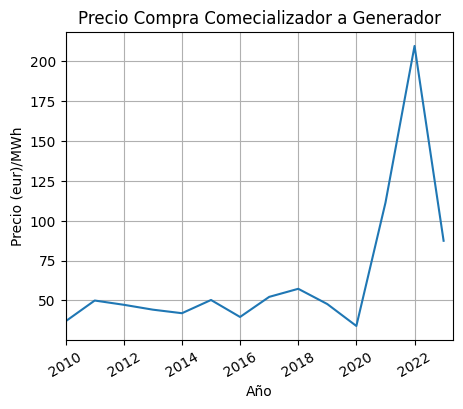

In [21]:
plt.figure(figsize=(5,4))

sns.lineplot(x="Año",y="Precio", data=mayoristas2, markers="o")
plt.title("Precio Compra Comecializador a Generador")
plt.ylabel("Precio (eur)/MWh")
plt.xticks(rotation=30)
plt.grid()
plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2023-05-01'))
plt.show()